In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [3]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [4]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})

In [5]:
ZRI.shape

(1861, 119)

In [6]:
#melt zri dataframe
ZRI_f = pd.melt(ZRI, id_vars =['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], value_vars=ZRI.iloc[:,6:119])


In [89]:
ZRI_f[ZRI_f.value == 0]

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year,Season


In [78]:
ZRI_f.columns[ZRI_f.isnull().any()]

Index(['Metro'], dtype='object')

Text(0.5, 1.0, 'ZRI Distribution')

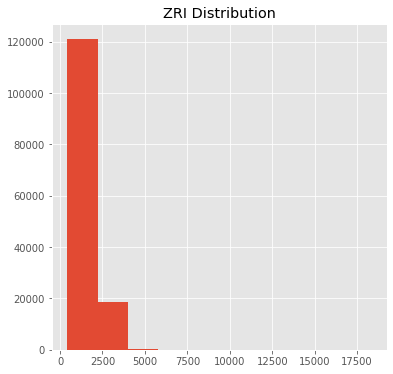

In [7]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('ZRI Distribution')

In [11]:
print('Rent Mean: ', np.mean(ZRI_f.value))
print('Rent Median: ', (ZRI_f.value).median())

upper_lim = np.mean(ZRI_f.value) + 3 * np.std(ZRI_f.value)
lower_lim = np.mean(ZRI_f.value) - 3 * np.std(ZRI_f.value)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Rent Mean:  1518.0649123433427
Rent Median:  1395.0
Outliers are above 3436.70 and below -400.57


In [ ]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.Value < 3436.70)]

Text(0.5, 1.0, 'Log Rent Distribution')

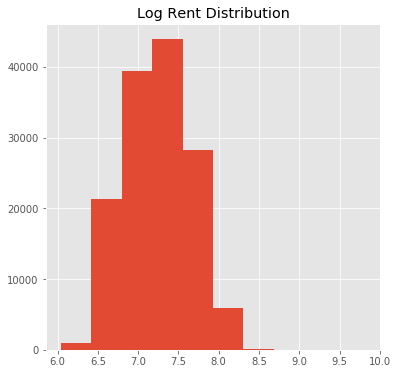

In [12]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

In [13]:
print('Log Rent Mean: %.1f' % np.mean(ZRI_f['LogValue']))

upper_lim = np.mean(ZRI_f['LogValue']) + 3.5 * np.std(ZRI_f['LogValue'])
lower_lim = np.mean(ZRI_f['LogValue']) - 3.5 * np.std(ZRI_f['LogValue'])
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log Rent Mean: 7.2
Outliers are above 8.7 and below 5.8


In [15]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
181886,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-10,18349.0,9.817330
200496,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2019-08,17943.0,9.794955
161415,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2017-11,15445.0,9.645041
168859,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-03,13434.0,9.505544
170720,11901,Riverhead,NY,New York-Newark-Jersey City,Suffolk County,1370,2018-04,13427.0,9.505023


In [16]:
ZRI_f[ZRI_f.LogValue < 5.8].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


In [17]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.LogValue < 8.7)]

In [18]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Log Rent Distribution')

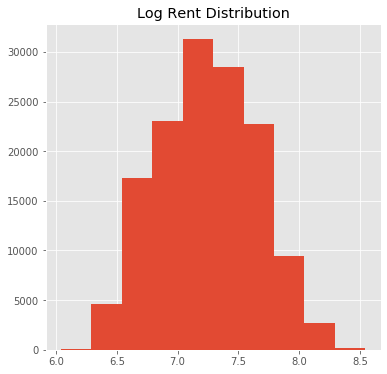

In [19]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

Text(0.5, 1.0, 'Rent Distribution')

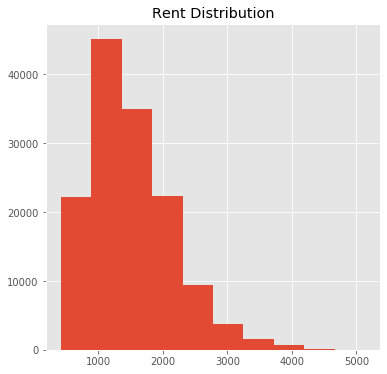

In [20]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('Rent Distribution')

In [21]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09,2930.0,7.982758
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09,1447.0,7.277248
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09,2797.0,7.936303
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09,1437.0,7.270313
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09,982.0,6.889591


In [22]:
ZRI_f['variable'] = pd.to_datetime(ZRI_f['variable'])
ZRI_f['Month'] = ZRI_f['variable'].dt.month
ZRI_f['Year'] = ZRI_f['variable'].dt.year

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [23]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010


Text(0.5, 1.0, 'Avg Yearly Rent')

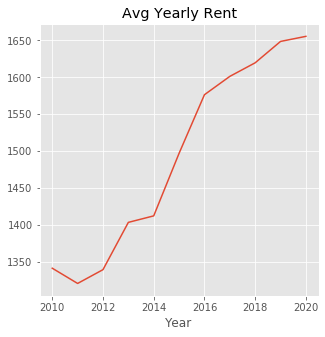

In [24]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'})['value'].plot()
plt.title('Avg Yearly Rent')

Text(0.5, 1.0, 'Avg Monthly Rent')

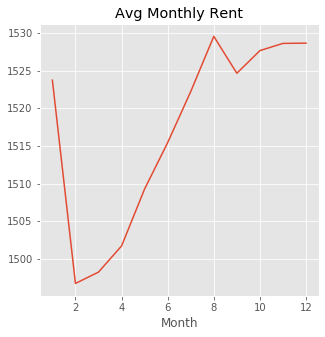

In [26]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Month').agg({'value':'mean'})['value'].plot()
plt.title('Avg Monthly Rent')

In [27]:
#Add season feature 

def month_to_season(month):
    if month in range(3,5):
        month = 'spring'
    elif month in range(6,8):
        month = 'summer'
    elif month in range(9,11):
        month = 'fall'
    else:
        month = 'winter'
    return(month)

ZRI_f['Season'] = ZRI_f.Month.apply(month_to_season)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,LogValue,Month,Year,Season
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,7.982758,9,2010,fall
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,7.277248,9,2010,fall
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,7.936303,9,2010,fall
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,7.270313,9,2010,fall
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,6.889591,9,2010,fall


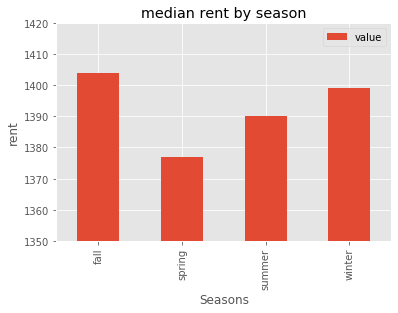

In [29]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

season_rent.plot.bar()
plt.title('median rent by season')
plt.xlabel('Seasons')
plt.ylabel('rent')
plt.ylim(1350,1420)
plt.show()

In [8]:
# calling in other dataframes to get features

ZRI = pd.read_csv('./data/df.csv', index_col=0)



In [9]:
ZRI.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,36061.0,NaN,NaN,NaN,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,17031.0,NaN,NaN,NaN,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,36061.0,NaN,NaN,NaN,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,17031.0,NaN,NaN,NaN,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,48141.0,NaN,NaN,NaN,9.2,5.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                                ZIPCODE  SizeRank     value     Month  \
ZIPCODE                        1.000000 -0.165910 -0.005555  0.000360   
SizeRank                      -0.165910  1.000000 -0.052289  0.000070   
value                         -0.005555 -0.052289  1.000000  0.013726   
Month                          0.000360  0.000070  0.013726  1.000000   
Year                           0.077055  0.020679  0.175005 -0.084601   
Season                         0.002346 -0.000844 -0.011468 -0.461847   
AGIncome                       0.056495 -0.433783  0.497109 -0.001063   
TotIncome                      0.065402 -0.417169  0.501981 -0.001110   
SalariesWages                  0.089486 -0.575857  0.499051 -0.000932   
NumUnemply                     0.038546 -0.423603 -0.010357  0.000445   
TotTaxes                      -0.052647 -0.235581  0.479563 -0.002837   
FIPSCode                      -0.228322 -0.000694 -0.257731 -0.001469   
Labor\nForce                   0.295967  0.198372  

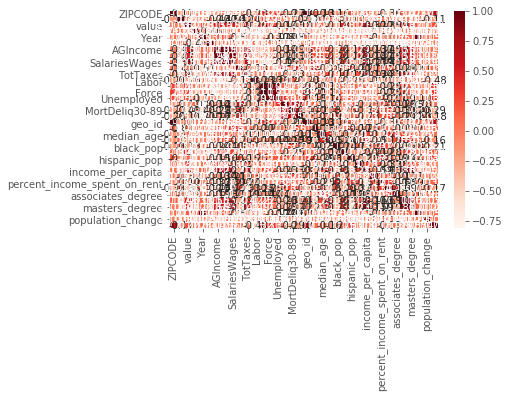

value                1.000000
TotIncome            0.501981
income_per_capita    0.539114
Name: value, dtype: float64


In [6]:
# Create correlation matrix and print it
cor = df.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["value"])

# Selecting highly correlated features
best_features = cor_target[cor_target > .5]
print(best_features)

In [9]:
Testing1 = df.copy()

In [14]:
Testing1.columns

Index(['value', 'Month', 'Year', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed',
       'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'geo_id', 'total_pop', 'median_age', 'white_pop',
       'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree', 'year',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [10]:
Testing1 = Testing1.drop(columns =['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [12]:
Testing1 = Testing1.drop(columns =['Year-Month'])

In [13]:
Testing1 = Testing1.drop(columns =['FIPSCode'])

In [132]:
Testing1.columns

Index(['value', 'Month', 'Year', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed',
       'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90'],
      dtype='object')

In [15]:
Testing1 = Testing1.apply(pd.to_numeric)

In [16]:
Testing1.head()

,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank
0,2930.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,881204.0,805555.0,75649.0,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,2643831.0,2356470.0,287361.0,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2797.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,881204.0,805555.0,75649.0,8.6,1.3,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1437.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,2643831.0,2356470.0,287361.0,10.9,3.7,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,982.0,9,2010.0,1,NaN,NaN,NaN,NaN,NaN,340841.0,309629.0,31212.0,9.2,5.9,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Testing1 = Testing1.dropna(subset=['value'])

In [18]:
Testing1 = Testing1[Testing1.Year > 2010]

In [20]:
Testing1 = Testing1[Testing1.Year < 2019]

In [21]:
X = Testing1.drop(columns =["value"]) 
y = Testing1.value


In [22]:
X = X.replace(np.nan, 0)


In [ ]:
# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=2)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

In [ ]:
# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('...', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

In [ ]:
# look into features correlations 


In [ ]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

In [ ]:
#removing outliers
y_train18_2 = y_train18[y_train18.value < 6000]

In [ ]:
pd.concat([X_train['SalariesWages'], y_train18_2['value']], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['SalariesWages']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


In [ ]:
pd.concat([np.log10(X_train['TotTaxes']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='TotTaxes', y='value')


In [ ]:
#MortDeliq30-89
pd.concat([np.log10(X_train['MortDeliq30-89']), np.log10(y_train18_2['value'])], axis=1).plot(kind='scatter', x='MortDeliq30-89', y='value')


In [ ]:
print('Income_per_capita Mean: ', np.mean(zri.income_per_capita))
print('Income_per_capita Median: ', (zri.income_per_capita).median())

upper_lim = np.mean(zri.income_per_capita) + 3 * np.std(zri.income_per_capita)
lower_lim = np.mean(zri.income_per_capita) - 3 * np.std(zri.income_per_capita)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

In [ ]:
print('TotTaxes Mean: ', np.mean(zri.TotTaxes))
print('TotTaxes Median: ', (zri.TotTaxes).median())

upper_lim = np.mean(zri.TotTaxes) + 3 * np.std(zri.TotTaxes)
lower_lim = np.mean(zri.TotTaxes) - 3 * np.std(zri.TotTaxes)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

In [ ]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="Logincome_per_capita",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5),
              ylim=(6,10))

In [ ]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="LogTotTaxes",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5),
              ylim=(6,10))